# IRIS Data Model
---
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthC`
- Species`

Dataset Link : http://archive.ics.uci.edu/


# Role of the Iris Dataset in Machine Learning

- The Iris dataset plays a crucial role in machine learning as a standard benchmark for testing classification algorithms.
  
- It is often used to demonstrate the effectiveness of algorithms in solving classification problems.
  
- Researchers use it to compare the performance of different algorithms and evaluate their accuracy, precision, and recall.ll.dataset/53/irisCm
Species

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('iris.data', names=["SepalLengthincm","SepalWidthincm","PetalLengthincm","PetalWidthincm","SpeciesFlower"])

In [3]:
df.head(10)

,SepalLengthincm,SepalWidthincm,PetalLengthincm,PetalWidthincm,SpeciesFlower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#shape
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLengthincm  150 non-null    float64
 1   SepalWidthincm   150 non-null    float64
 2   PetalLengthincm  150 non-null    float64
 3   PetalWidthincm   150 non-null    float64
 4   SpeciesFlower    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthincm,SepalWidthincm,PetalLengthincm,PetalWidthincm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for the null values

In [7]:
def find_dirty_values(data):
    dtypes = pd.DataFrame(data.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=data.nunique().sort_values(ascending=True)
    dtypes["Null Values"]=data.isnull().sum()
    dtypes["% null Values"]=data.isnull().sum()/len(data)
    return dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

In [8]:
null_data = find_dirty_values(df)
null_data

,Data Type,Unique Values,Null Values,% null Values
SepalLengthincm,float64,35,0,0.000000
SepalWidthincm,float64,23,0,0.000000
PetalLengthincm,float64,43,0,0.000000
PetalWidthincm,float64,22,0,0.000000
SpeciesFlower,object,3,0,0.000000


# Data Visualization

In [9]:
# types of species - univariate analysis {Non Graphical Analysis}
df['SpeciesFlower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df1 = df.iloc[:, 0:4]
df1

,SepalLengthincm,SepalWidthincm,PetalLengthincm,PetalWidthincm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# numerical ananlyis = Heatmap
corelation_matrix  = df1.corr()
corelation_matrix

,SepalLengthincm,SepalWidthincm,PetalLengthincm,PetalWidthincm
SepalLengthincm,1.000000,-0.109369,0.871754,0.817954
SepalWidthincm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthincm,0.871754,-0.420516,1.000000,0.962757
PetalWidthincm,0.817954,-0.356544,0.962757,1.000000


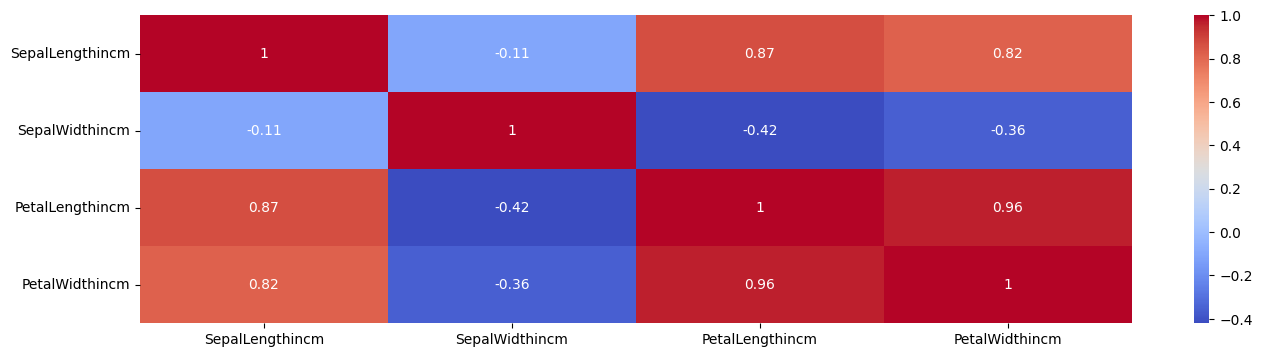

In [12]:
plt.figure(figsize=(16,4))
sns.heatmap(corelation_matrix, annot=True,cmap='coolwarm')
plt.show()

<Axes: ylabel='PetalWidthincm'>

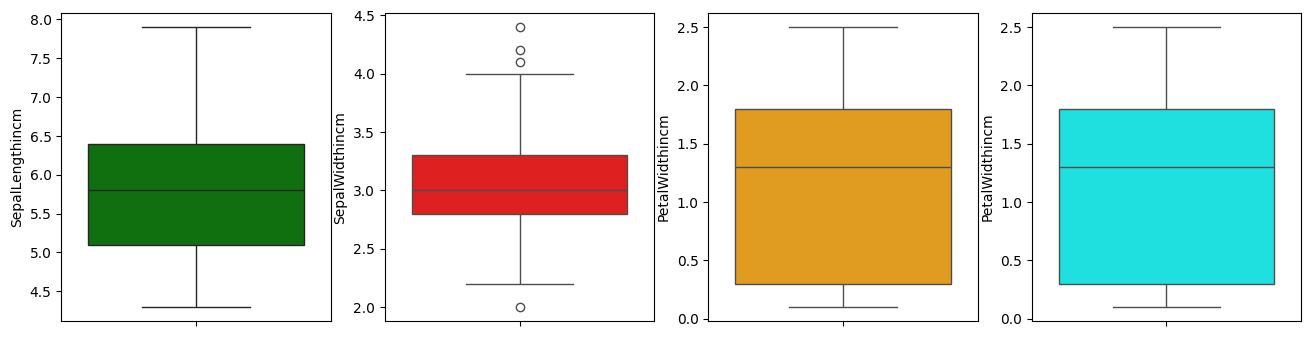

In [13]:
# plotting box plot to recognize outlier
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLengthincm', color='green')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidthincm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalWidthincm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidthincm',color='cyan')

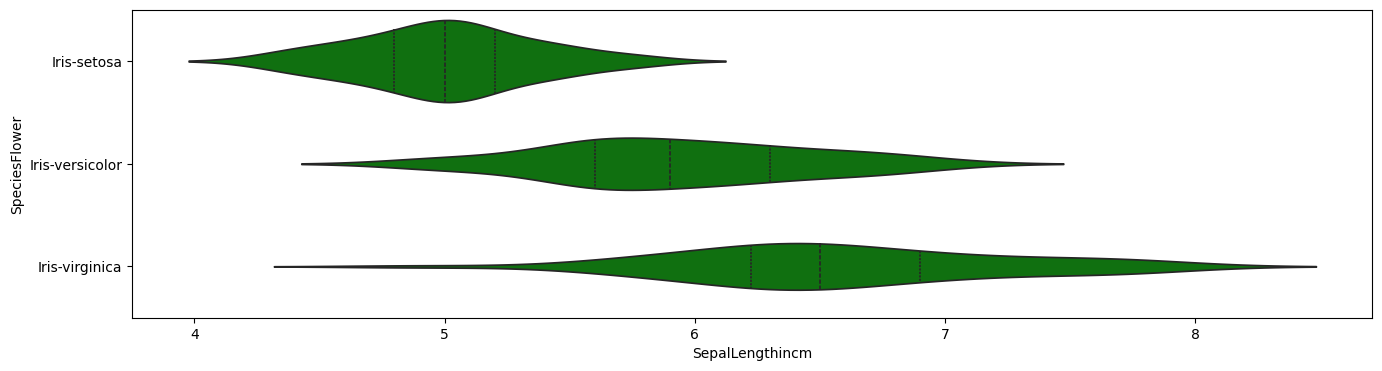

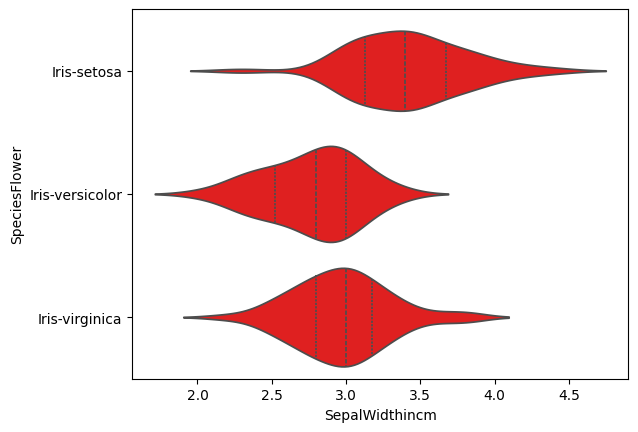

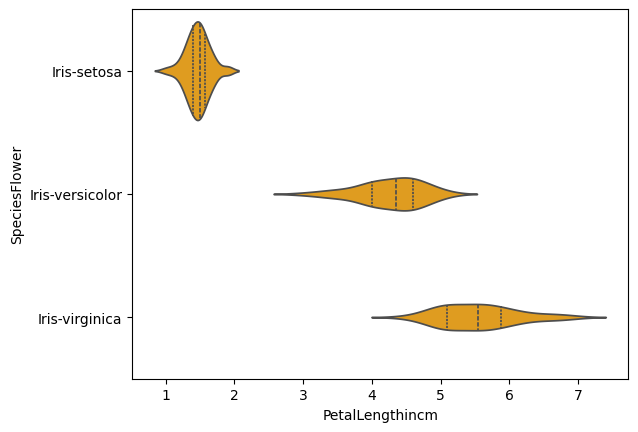

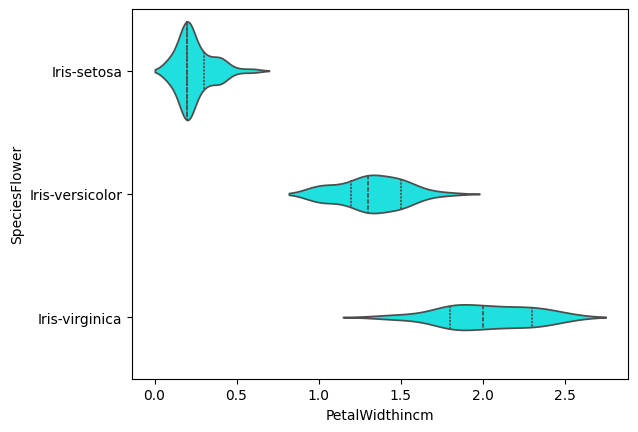

In [14]:
# Bivariate analysis 
plt.figure(figsize = (16,4))
sns.violinplot(y='SpeciesFlower', x='SepalLengthincm', data=df, inner='quartile', color='green')
plt.show()
sns.violinplot(y='SpeciesFlower', x='SepalWidthincm', data=df, inner='quartile', color='red')
plt.show()
sns.violinplot(y='SpeciesFlower', x='PetalLengthincm', data=df, inner='quartile', color='orange')
plt.show()
sns.violinplot(y='SpeciesFlower', x='PetalWidthincm', data=df, inner='quartile', color='cyan')
plt.show()

<Axes: xlabel='SepalWidthincm', ylabel='PetalWidthincm'>

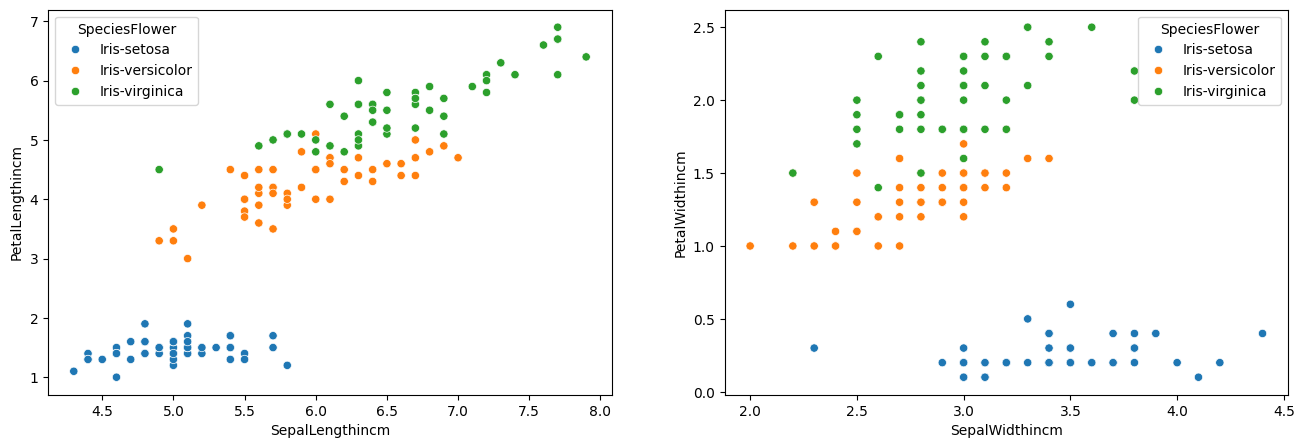

In [15]:
# scatter plot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthincm',y='PetalLengthincm',data=df,hue='SpeciesFlower',ax=ax1)
sns.scatterplot(x='SepalWidthincm',y='PetalWidthincm',data=df,hue='SpeciesFlower',ax=ax2)

In [16]:
df.columns

Index(['SepalLengthincm', 'SepalWidthincm', 'PetalLengthincm',
       'PetalWidthincm', 'SpeciesFlower'],
      dtype='object')

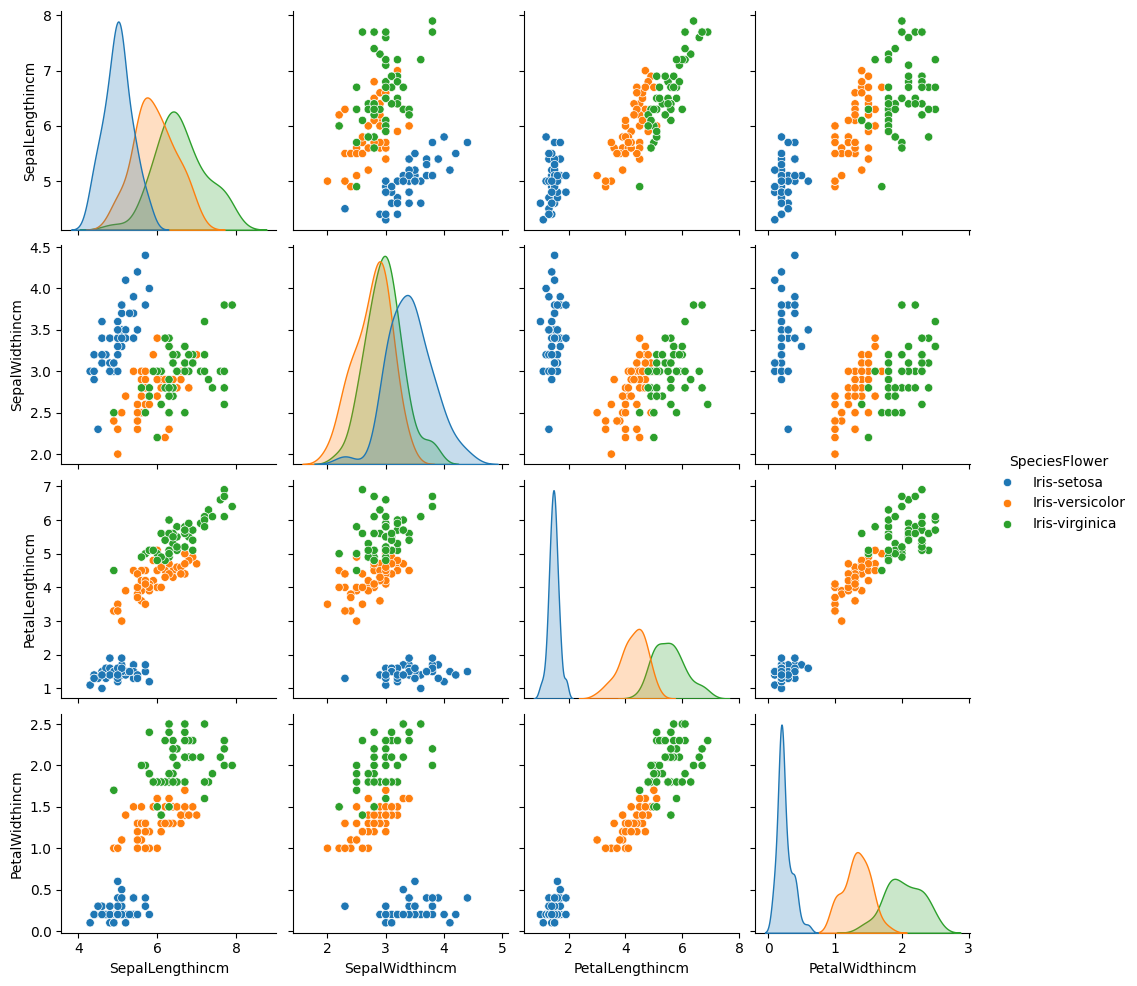

In [17]:
# Now, Plotting matix of graphs that enables visuals of relationship between each pair of variables in a dataset
sns.pairplot(df,hue="SpeciesFlower")

# Traing and Testing

In [18]:
# Building Model
X = df.drop(columns=['SpeciesFlower'])
Y = df['SpeciesFlower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)
print(f"Shape Of Training Data Set : ",x_train.shape)
print(f"Shape Of Testing Data Set :",x_test.shape)
print(f"Shape Of Train Label :",y_train.shape)
print(f"Shape Of Test Label :",y_test.shape)

Shape Of Training Data Set :  (105, 4)
Shape Of Testing Data Set : (45, 4)
Shape Of Train Label : (105,)
Shape Of Test Label : (45,)


In [19]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

# Fitting different models Algortithms
---
# 1. Logistic Regression

In [20]:
lg= LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
score1=accuracy_score(y_test,y_pred)
report(lg)
accuracy_lg = round(score1*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


# 2. Linear SVC

In [21]:
rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
L_svc=LinearSVC()
L_svc.fit(x_train,y_train)
y_pred=L_svc.predict(x_test)
score2=accuracy_score(y_test,y_pred)
report(L_svc)
accuracy_svc = round(score2*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 100.0%


# 3. Decision Tree 

In [22]:
DTC = DecisionTreeClassifier()
DTC=DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
score3=accuracy_score(y_test,y_pred)
report(DTC)
accuracy_dtc = round(score3*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 100.0%


# 4. Naïve Bayes

In [23]:
NB= MultinomialNB()
NB.fit(x_train,y_train)
y_pred=NB.predict(x_test)
score4=accuracy_score(y_test,y_pred)
report(NB)
accuracy_nb = round(score4*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 100.0%


# 5. K Nearest Neighbour

In [24]:
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)
y_pred=KNN.predict(x_test)
score5=accuracy_score(y_test,y_pred)
report(KNN)
accuracy_knn = round(score5*100,2)
print(f'Accuracy: {accuracy_lg}%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


# 6. Gradient Boost algorithm

In [25]:
gb = GradientBoostingClassifier(learning_rate=.1,max_depth=4,n_estimators=50)
gb.fit(x_train,y_train)
train_pred = gb.predict(x_train)
test_pred = gb.predict(x_test)
gb_train_acc = accuracy_score(y_train,train_pred)*100
gb_test_acc = accuracy_score(y_test,test_pred)*100
print("Training Accuracy : ",gb_train_acc)
print("Test Accuracy : ",gb_test_acc)
print("Classification Report:\n",classification_report(y_train,train_pred))

Training Accuracy :  100.0
Test Accuracy :  97.77777777777777
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       1.00      1.00      1.00        35
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



# Comparing all algorithms to state best fit model

In [26]:
cols = [
    ["Logistic Regression",accuracy_lg],
    ["Linear SVC", accuracy_svc],
    ["Naive Bayes", accuracy_nb],
    ["Decision Trees", accuracy_dtc],
    ["K Nearest Neighbour", accuracy_knn],
    ["Gradient Boosting", gb_test_acc]
    ]
results = pd.DataFrame( cols,
                       columns = ["Model","Accuracy %"]).sort_values(
                        by="Accuracy %",ascending=False)
results.style.background_gradient(cmap='Set1')

,Model,Accuracy %
0,Logistic Regression,100.000000
4,K Nearest Neighbour,100.000000
2,Naive Bayes,97.780000
3,Decision Trees,97.780000
5,Gradient Boosting,97.777778
1,Linear SVC,95.560000
